### Import Libraries

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.metrics import mean_squared_error
import datetime as dt

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
import xgboost as xgb

### Import Dataset

In [110]:
df = pd.read_csv("TransactionsTestDataset.csv")
df.sample(5)

,Platform,userid,IN-APP PRODUCTID,Country,Price in local currency,Currency,Timestamp
8241,ANDROID,6.809401252,offer4,US,3.99,USD,25/12/2016 15:52
4465,ANDROID,6.740700124,pack3.shields,NL,7.99,EUR,21/01/2017 11:43
5278,ANDROID,6.80859876,offer4,US,3.99,USD,21/12/2016 18:09
7230,ANDROID,5.969378632,offer10,US,9.99,USD,05/02/2017 06:30
6430,ANDROID,6.826312433,offer4,US,3.99,USD,05/03/2017 15:58


In [111]:
df = df.rename(columns = {" Price in local currency ": "Price in local currency"})

**Insights of rows having Currency 0**

In [112]:
df[df["Currency"] == "0"]

,Platform,userid,IN-APP PRODUCTID,Country,Price in local currency,Currency,Timestamp
3,ANDROID,6.831281255,offer4,US,0.0,0,27/03/2017 16:58
5,ANDROID,6.831281255,offer4,US,0.0,0,27/03/2017 16:32
6,ANDROID,6.831281255,offer4,US,0.0,0,27/03/2017 16:28
23,ANDROID,6.82784951,pack2.shields,FR,3.0,0,26/03/2017 19:17
42,ANDROID,6.827575966,pack2.shields,US,0.0,0,25/03/2017 22:27
...,...,...,...,...,...,...,...
7193,ANDROID,6.819771486,offer4,US,0.0,0,06/02/2017 15:39
7203,ANDROID,6.404055736,pack2.shields,US,0.0,0,05/02/2017 20:07
7266,ANDROID,6.818832162,offer4,US,0.0,0,03/02/2017 16:02
7351,ANDROID,6.81747394,offer4,US,0.0,0,29/01/2017 19:46


**Remove these rows from data**

In [113]:
mask = df['Currency'].isin(["0"])

df = df[~mask]

In [114]:
mask2 = df['userid'].isin(['#NUM!'])
df = df[~mask2]

**Create Date Column**

In [115]:
# Extract Date
df["Date"] = df["Timestamp"].str.split(" ").str.get(0)

# Convert to datetime dtype
df["Date"] = pd.to_datetime(df["Date"])

**Delete Timestamp Column**

In [116]:
del df["Timestamp"]

In [117]:
def currency(column):
    x = column[0]
    y = column[1]
    if x == "EUR":
        return y * 1.05
    
    elif x == "KRW":
        return y * 0.00079
    
    elif x == "GBP":
        return y * 1.26
    
    elif x == "CAD":
        return y * 0.78
    
    elif x == "TRY":
        return y * 0.067
    
    elif x == "BRL":
        return y * 0.20
    
    elif x == "IDR":
        return y * 0.000069
    
    elif x == "RUB":
        return y * 0.014
    
    elif x == "CLP":
        return y * 0.0012
    
    elif x == "THB":
        return y * 0.029
    
    elif x == "SEK":
        return y * 0.10
    
    elif x == "NOK":
        return y * 0.11
    
    elif x == "JPY":
        return y * 0.0077
    
    elif x == "UAH":
        return y * 0.033
    
    elif x == "RON":
        return y * 0.21
    
    elif x == "CHF":
        return y * 1.03
    
    elif x == "LBP":
        return y * 0.00066
    
    elif x == "MYR":
        return y * 0.23
    
    elif x == "TWD":
        return y * 0.034
    
    elif x == "PHP":
        return y * 0.019
    
    elif x == "AED":
        return y * 0.27
    
    elif x == "MXN":
        return y * 0.049
    
    elif x == "ZAR":
        return y * 0.063
    
    elif x == "AUD":
        return y * 0.71
    
    elif x == "HRK":
        return y * 0.14
    
    elif x == "CNY":
        return y * 0.15
    
    elif x == "ILS":
        return y * 0.30
    
    else:
        return y * 1


df["Price in USD"] = df[["Currency", "Price in local currency"]].apply(currency, axis = 1)

### Data Analysis and Visualization

**Number of Times Platform used by Customers**

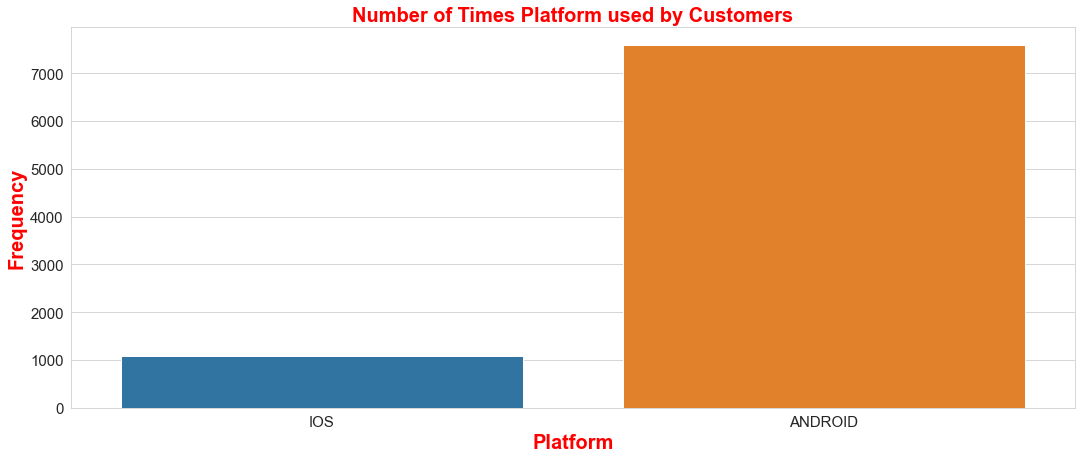

In [118]:
plt.figure(figsize = (18, 7))
sns.countplot(x = "Platform", data = df)
plt.title("Number of Times Platform used by Customers", color = "red", weight = "bold", size = 20)
plt.xlabel("Platform", color = "red", size = 20, weight = "bold")
plt.ylabel("Frequency", color = "red", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Top 10 Most Repeated Customers**

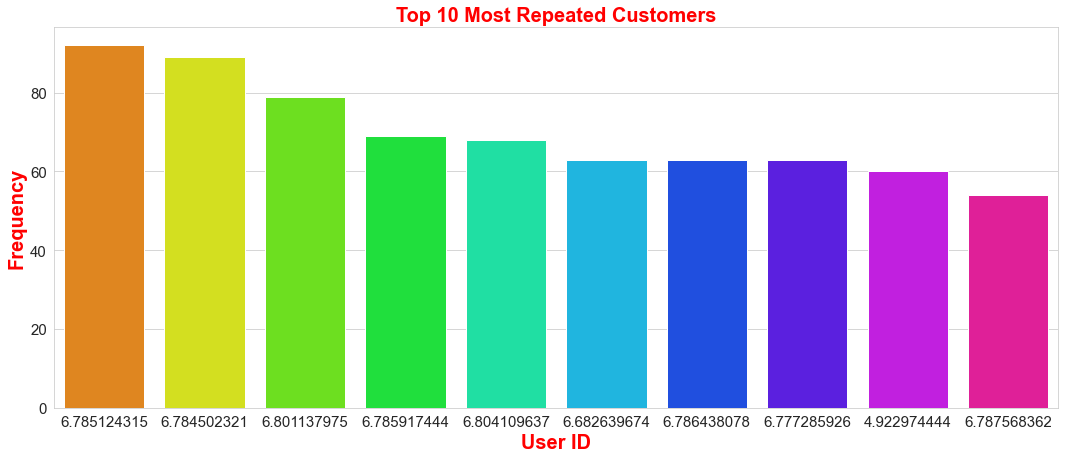

In [119]:
repeated_customers = df["userid"].value_counts().to_frame().reset_index()
repeated_customers.columns = ["User ID", "Frequency"]
repeated_customers = repeated_customers.head(10)

plt.figure(figsize = (18, 7))
sns.barplot(x = "User ID", y = "Frequency", data = repeated_customers, palette = "hsv")
plt.title("Top 10 Most Repeated Customers", color = "red", weight = "bold", size = 20)
plt.xlabel("User ID", color = "red", size = 20, weight = "bold")
plt.ylabel("Frequency", color = "red", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Number of Times IN-APP-PRODUCTS used by Customers**

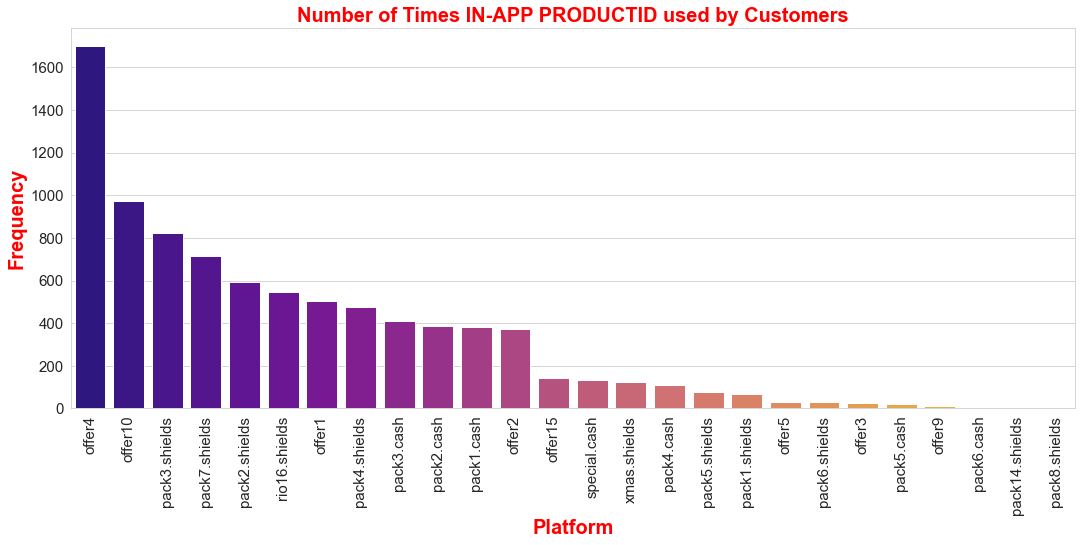

In [120]:
app_products = df["IN-APP PRODUCTID"].value_counts().to_frame().reset_index()
app_products.columns = ["IN-APP PRODUCTID", "Frequency"]

plt.figure(figsize = (18, 7))
sns.barplot(x = "IN-APP PRODUCTID", y = "Frequency", data = app_products, palette = "plasma")
plt.title("Number of Times IN-APP PRODUCTID used by Customers", color = "red", weight = "bold", size = 20)
plt.xlabel("Platform", color = "red", size = 20, weight = "bold")
plt.ylabel("Frequency", color = "red", size = 20, weight = "bold")
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.show()

**Total Customers by Countries**

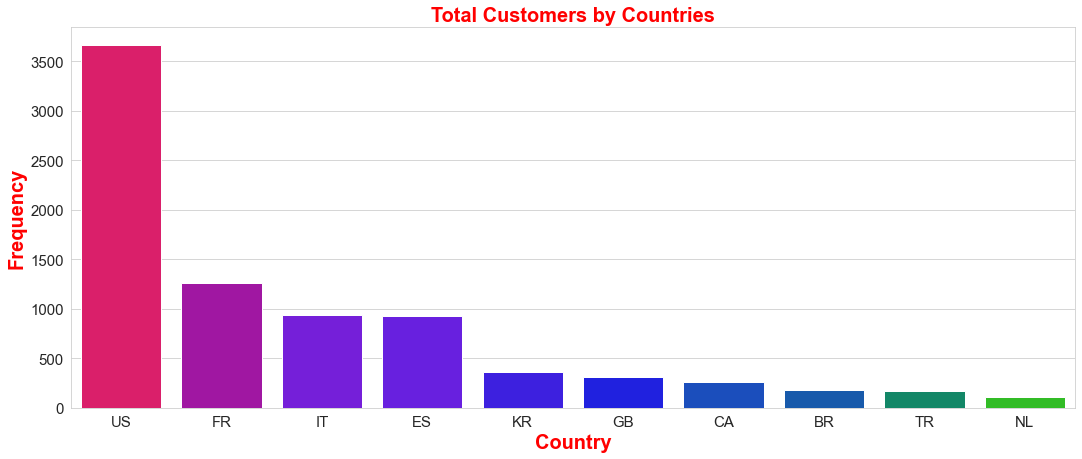

In [121]:
country_customers = df["Country"].value_counts().to_frame().reset_index()
country_customers.columns = ["Country", "Frequency"]
country_customers = country_customers.head(10)

plt.figure(figsize = (18, 7))
sns.barplot(x = "Country", y = "Frequency", data = country_customers, palette = "prism")
plt.title("Total Customers by Countries", color = "red", weight = "bold", size = 20)
plt.xlabel("Country", color = "red", size = 20, weight = "bold")
plt.ylabel("Frequency", color = "red", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### Customer Lifetime Value

**Select Relevant Columns**

In [122]:
df = df[["userid", "Date", "Price in USD"]]
df.head()

,userid,Date,Price in USD
0,5.669802981,2017-03-28,1.9900
1,6.831350998,2017-03-27,3.9900
2,6.831233793,2017-03-27,4.0092
4,5.181331848,2017-03-27,2.0895
7,6.529604089,2017-03-27,1.8795


**In the dataset, the last order date is December 03, 2017, we have used this date as NOW date to calculate recency.**

In [123]:
now = dt.datetime(2017, 12, 3)

In [124]:
df["Invoice"] = df[["Date"]]

In [125]:
rfm = df.groupby("userid").agg({"Date":         lambda x: (now - x.max()).days,  # Recency
                                "Invoice":         lambda x: x.count(),             # Frequenxy
                                "Price in USD": lambda x: x.sum()})              # Monetary
rfm.columns = ["Recency", "Frequency", "Monetary"]
rfm.head()

,Recency,Frequency,Monetary
userid,,,
3.43964843,345,1,9.4395
3.487279816,122,1,2.0895
3.518908574,277,1,4.1895
3.533772058,280,3,20.1222
3.597036665,343,1,3.9900


**1. Calculate Average Order Value**

In [126]:
rfm["average_order_value"] = rfm["Monetary"] / rfm["Frequency"]
rfm.head()

,Recency,Frequency,Monetary,average_order_value
userid,,,,
3.43964843,345,1,9.4395,9.4395
3.487279816,122,1,2.0895,2.0895
3.518908574,277,1,4.1895,4.1895
3.533772058,280,3,20.1222,6.7074
3.597036665,343,1,3.9900,3.9900


**2. Calculate Purchase Frequency**

In [127]:
purchase_frequency = rfm["Frequency"].mean()
print(purchase_frequency)

2.99584918713248


**3. Calculate Repeat Rate**

In [128]:
repeat_rate = rfm[rfm["Frequency"] > 1].shape[0] / rfm.shape[0]
print(repeat_rate)

0.45658941542718784


**4. Calculate Churn Rate**

In [129]:
churn_rate = 1 - repeat_rate
print(churn_rate)

0.5434105845728121


**5. Calculate Profit Margin**

Let's assume our business has approx 5% profit on the total sale.

In [130]:
rfm["profit_margin"] = rfm["Monetary"] * 0.05
rfm.sample(5)

,Recency,Frequency,Monetary,average_order_value,profit_margin
userid,,,,,
5.495868896,277,1,1.9900,1.990000,0.099500
6.48253759,122,2,0.6760,0.338000,0.033800
6.820205862,123,1,3.9900,3.990000,0.199500
6.667406719,245,41,105.0800,2.562927,5.254000
6.826042197,275,3,13.5135,4.504500,0.675675


**6. Calcualte Customer Lifetime Value**

In [131]:
# Customer Value
rfm["customer_value"] = (rfm["average_order_value"] * purchase_frequency) / churn_rate

# Customer Lifetime Value
rfm["customer_lifetime_value"] = rfm["customer_value"] * rfm["profit_margin"]

rfm.sample(5)

,Recency,Frequency,Monetary,average_order_value,profit_margin,customer_value,customer_lifetime_value
userid,,,,,,,
6.817573236,0,3,12.1485,4.0495,0.607425,22.325092,13.560819
5.669802981,250,1,1.9900,1.9900,0.099500,10.970968,1.091611
6.526319501,417,1,1.0395,1.0395,0.051975,5.730814,0.297859
6.823900685,283,1,4.1895,4.1895,0.209475,23.096919,4.838227
6.438031337,323,1,9.9900,9.9900,0.499500,55.075360,27.510142


**As our data is related to 2016-2017 so COVID-19 affect is not considered here**

In [143]:
X = rfm[rfm.columns.drop("customer_lifetime_value")]
y = rfm["customer_lifetime_value"]

**Split data into training set and testing set**

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

**Scaling**

In [149]:
scaler = StandardScaler()

scaler_train = scaler.fit_transform(X_train)
scaler_test = scaler.transform(X_test)

### Linear Regression

In [153]:
lr = LinearRegression()

lr.fit(scaler_train, y_train)

pred_lr = lr.predict(scaler_test)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_lr}).sample(10)

,Actual,Predicted
userid,,
6.827311751,9.266554,39.032392
6.828883945,4.838227,9.366809
6.255310866,0.345778,-62.065447
6.448064295,1.321103,-77.160582
6.824734266,4.388415,5.579493
6.648248349,57.290357,126.545759
6.80631472,90.989795,236.215656
6.812696222,4.388415,-0.577389
6.712142982,1.203501,-44.035044


**Linear Regression Performance**

In [154]:
lrp = mean_squared_error(y_test, pred_lr, squared = False)
lrp

99.39269145202286

### Support Vector Machine

In [155]:
svr = SVR()

svr.fit(scaler_train, y_train)

pred_svr = svr.predict(scaler_test)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_svr}).sample(10)

,Actual,Predicted
userid,,
5.074977261,4.928721,3.462144
6.808071274,9.957945,9.004293
6.806297557,4.838227,4.747449
6.830408434,6.301907,7.626594
6.742281186,5.823158,4.939984
6.48977615,4.388415,4.270531
5.696379982,3.768505,5.146066
5.597730279,4.838227,5.059919
6.646780213,4.838227,5.047894


In [156]:
svrp = mean_squared_error(y_test, pred_svr, squared = False)
svrp

206.68029009440383

### XGBoost Regression

In [158]:
xg = xgb.XGBRegressor()

xg.fit(scaler_train, y_train)

pred_xg = xg.predict(scaler_test)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_xg}).sample(10)

,Actual,Predicted
userid,,
6.124753905,117.584256,112.606506
6.824562123,4.388415,4.397314
6.806225437,7.827330,7.792625
5.084079146,4.838227,4.821512
6.289205989,0.297859,0.293093
5.349079281,99.737223,93.577431
6.827311751,9.266554,9.356291
6.8262998,2.477565,2.514377
4.679091597,0.297859,0.297918


In [159]:
xgp = mean_squared_error(y_test, pred_xg, squared = False)
xgp

118.60712418409412

### ANN

In [167]:
model = Sequential()

model.add(Dense(25, activation = "relu", input_dim = 6))
model.add(Dense(25, activation = "relu"))
model.add(Dense(1, activation = "relu"))

model.compile(optimizer = "adam", loss = "mean_squared_error")
model.fit(scaler_train, y_train)

73/73 [==============================] - 0s 1ms/step - loss: 153301.9531


In [168]:
pred = model.predict(scaler_test)

In [170]:
pd.DataFrame({"Actual": y_test,
             "Predicted": pred.flatten()}).sample(10)

,Actual,Predicted
userid,,
6.819081363,4.388415,0.828914
6.814235006,18.654297,0.520076
6.161398552,4.838227,1.717096
6.828206873,4.838227,1.721697
6.820456114,6.529738,1.296744
6.610288512,4.195169,1.043064
6.801465385,1.203501,1.153872
6.827311751,9.266554,1.304170
6.756860727,4.838227,0.795638


In [172]:
annp = mean_squared_error(y_test, pred, squared = False)
annp

227.27849541123135